In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


## 1. 读取数据

In [16]:
data = pd.read_csv('train.csv')

**调整对应的日期格式，并删除掉不需要的列**

In [17]:
# 调整日期类型
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')
# 改动data的index
data.index = data['Datetime']
data.drop(['ID','Datetime'], axis=1, inplace=True)

In [18]:
daily_data = data.resample('D').sum()
daily_data.head()

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


**修改prophet需要的的关键字**

In [19]:
daily_data['ds'] = daily_data.index
daily_data['y'] = daily_data['Count']
daily_data.drop(['Count'], axis=1, inplace=True)
daily_data.head()

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60


## 2. 创建和训练模型

In [21]:
# 创建训练模型
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
m.fit(daily_data)
# 预测模型
future = m.make_future_dataframe(periods=213) # 7个月=213天
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


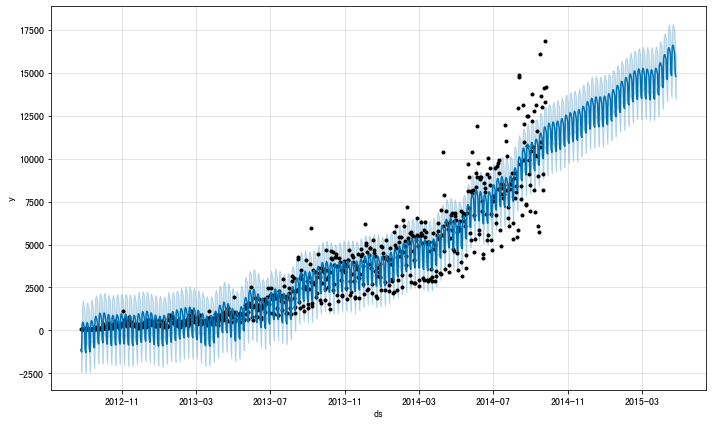

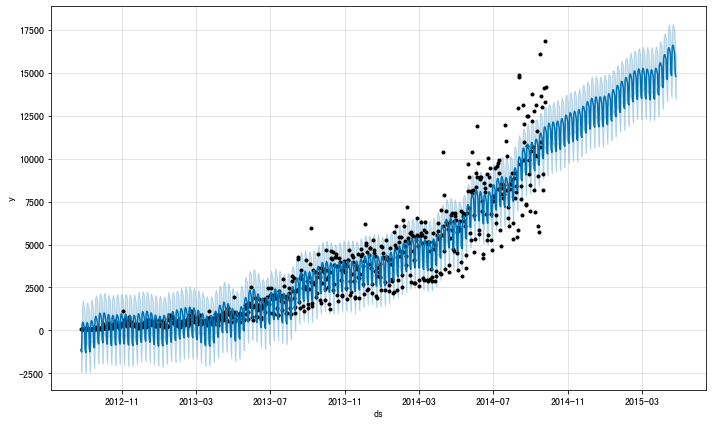

In [23]:
m.plot(forecast)

**结论**：prophet在预测这个场景的预测作用并不是很好，能看得出来黑色点的抖动要大于深蓝色的范围，也就是预测值的范围，而浅蓝色表示的置信区间也难以覆盖所有数据点。总体来说prophet可以作为一个baseline，但是需要更多的特征加入模型才能更好的拟合模型